# Angewandte Aspekte der Sprechforschung: Individuelle Sprechstile


## *Shushen Manakhimova*

## *Professor Burkhardt*

#### Sommersemester 2021 01.09.2021

We begin with downloading all the required modules for the project. Modules are simply files  with Python code (a code library or a set of functions that you need) that can be imported inside another Python Program. 

You can use any Python source file as a module by executing an import statement in some other Python source file. 

Step 1 in our code

In the project we use the code from Professor Uwe Reichel to extract Midlevel Descriptors 

In [1]:
import sys 
#sys module provides information about constants, functions and methods. 
#First, we have to import the sys module in our program before running any functions
sys.path.append("./mld/src") #adding a specific path for interpreter to search
import midlevel_descriptors as mld #Uwe Reichel Github 
import opensmile # audio feature extraction and classification of speech and music signals
import os # provides functions for interacting with the operating system (individual files)
import pandas as pd #module for data analysis toolkit 
import IPython #interactive shell, we will use it later to play the audio
import audiofile as af 
sys.path.append("./text_features") #adding a path for the interpreter to search 
import text_features as tf #extracting linguistic features (number of pronouns, etc)
import asr as speechrec #used to transcribe speeches
asr = speechrec.ASR('eng') #assigning value to a variable, using function ASR

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shushanamanakhimova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_king = pd.read_pickle('/Users/shushanamanakhimova/S_Sprechstil/segments/Shushana_mdf.pkl') #reading the file provided by our Professor
df_king['segmented_file'] = df_king['segmented_file'].apply(lambda x: 'segments/'+os.path.basename(x)) #changing the path
df_king = df_king.set_index(df_king.segmented_file) #setting the index
df_king = df_king.drop(columns=['segmented_file', 'channel']) #erasing extra information

In [3]:
df_king.head() #head() function is used to get the first n-rows.

""
segmented_file
segments/MK_Shushana_seg_00000000.wav
segments/MK_Shushana_seg_00000001.wav
segments/MK_Shushana_seg_00000002.wav
segments/MK_Shushana_seg_00000003.wav
segments/MK_Shushana_seg_00000004.wav


In [4]:
IPython.display.Audio(df_king.index[3]) #playing the file, choosing a file with an index

In [5]:
fex_mld = mld.MLD() #mld feature extraction
df_mld_seqs = fex_mld.extract_from_index(index=df_king, cache_path='./tmp/mld')
df_asr = asr.extract_from_index(df_mld_seqs, tmp='./tmp',  margin=0.2)

  0%|          | 0/77 [00:00<?, ?it/s]

ASR ...


100%|██████████| 77/77 [01:23<00:00,  1.09s/it]


In [6]:
df_king.shape #shows the number of rows and columns

(77, 0)

In [7]:
df_mld_seqs.shape #the result is that the speech is quite short (77 segments, 580 rows of features in general)

(77, 580)

In [8]:
df_mld_seqs.head(5) #for every row we have to extract the contents, all of the mld features

,hld_sylRate,hld_gapRel,hld_nSyl,lld_voicingFinalUnclipped_sma_diff,lld_voicingFinalUnclipped_sma_end,lld_voicingFinalUnclipped_sma_iqr,lld_voicingFinalUnclipped_sma_median,lld_voicingFinalUnclipped_sma_peak,lld_voicingFinalUnclipped_sma_q_kurtosis,lld_voicingFinalUnclipped_sma_q_range5,...,rhy_f0_sm3,rhy_f0_sm4,rhy_en_mae,rhy_en_prop,rhy_en_sm1,rhy_en_sm2,rhy_en_sm3,rhy_en_sm4,rhy_iso_pvi,rhy_iso_varco
file,,,,,,,,,,,,,,,,,,,,,
segments/MK_Shushana_seg_00000000.wav,3.133903,0.406810,11,0.032466,-0.082456,0.121729,0.852141,0.035791,1.483812,0.205356,...,-5.654196,1.497943e+04,15.185844,0.392165,4.752070,5.038296,-5.654196,1.497943e+04,61.616362,60.321538
segments/MK_Shushana_seg_00000001.wav,5.000000,0.142842,15,0.126924,0.043376,0.058942,0.838240,0.051444,1.759444,0.149832,...,21.151298,8.163995e+04,7.839813,0.337130,4.480167,2.645115,21.151298,8.163995e+04,51.443438,35.440090
segments/MK_Shushana_seg_00000002.wav,4.655493,0.153301,25,0.121562,-0.169878,0.059769,0.848904,0.037023,2.216715,0.174406,...,41.445576,1.797183e+06,35.884774,0.620276,4.914906,2.037406,41.445576,1.797183e+06,46.348815,49.108020
segments/MK_Shushana_seg_00000003.wav,4.761905,0.265718,10,0.537110,-0.103053,0.102736,0.863191,0.032554,1.265801,0.174375,...,19.385288,5.076932e+04,27.822477,0.093920,4.665485,2.800312,19.385288,5.076932e+04,37.980769,26.263966
segments/MK_Shushana_seg_00000004.wav,5.314010,0.158515,11,0.098137,-0.040922,0.035721,0.845938,0.048472,2.288875,0.100583,...,20.353543,6.875814e+04,5.392356,0.314143,4.396375,2.562367,20.353543,6.875814e+04,58.701730,35.765109


In [9]:
smile_lld = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.LowLevelDescriptors,
)
smile_functionals = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.Functionals,
) 

In [10]:
lld_df = smile_lld.process_files(df_king.index)
print(lld_df.shape)

(33247, 18)


In [11]:
funct_df = smile_functionals.process_files(df_king.index)
print(funct_df.shape)

(77, 62)


In [12]:
lld_df.head(3)

Loudness_sma3  \
file                                  start                  end                                     
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000       0.482796   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000       0.471284   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000       0.471828   

                                                                                     alphaRatio_sma3  \
file                                  start                  end                                       
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000        -3.980864   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000        -3.843598   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000        -3.772725   

                                                                                     hammarbergIndex_sma3  \
file                                  start                  end                                            
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000             13.745495   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000             14.215206   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000             13.833827   

                                                                                     slope0-500_sma3  \
file                                  start                  end                                       
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000         0.057922   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000         0.049021   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000         0.042170   

                                                                                     slope500-1500_sma3  \
file                                  start                  end                                          
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000           -0.009590   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000           -0.007387   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000           -0.009803   

                                                                                     F0semitoneFrom27.5Hz_sma3nz  \
file                                  start                  end                                                   
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000                          0.0   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000                          0.0   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000                          0.0   

                                                                                     jitterLocal_sma3nz  \
file                                  start                  end                                          
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000                 0.0   
                                      0 days 00:00:00.010000 0 days 00:00:00.030000                 0.0   
                                      0 days 00:00:00.020000 0 days 00:00:00.040000                 0.0   

                                                                                     shimmerLocaldB_sma3nz  \
file                                  start                  end                                             
segments/MK_Shushana_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000                    0.0   
   

In [13]:
funct_df.head(3)

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
file,start,end,,,,,,,,,,,,,,,,,,,,,
segments/MK_Shushana_seg_00000000.wav,0 days,0 days 00:00:04.400000,37.852230,0.147330,35.071732,35.805927,36.585930,1.514198,110.545921,87.197197,84.438805,49.858772,...,-2.956277,9.778351,0.076706,-0.008176,2.277905,2.314815,0.319000,0.226647,0.100000,0.058689
segments/MK_Shushana_seg_00000001.wav,0 days,0 days 00:00:03.500000,37.220661,0.070998,36.236435,36.599121,37.071995,0.835560,39.006725,27.869808,16.519291,6.756053,...,-2.104716,8.211987,0.100379,-0.020893,2.865330,1.744186,0.476667,0.452168,0.064286,0.019898
segments/MK_Shushana_seg_00000002.wav,0 days,0 days 00:00:05.740000,37.949883,0.140312,35.182346,36.352234,38.163387,2.981041,213.059616,175.908752,97.652000,99.759666,...,-2.090694,9.025295,0.090914,-0.010098,3.839442,1.760563,0.427000,0.316198,0.119000,0.108208


In [14]:
df_mld_seqs.head(5)

,hld_sylRate,hld_gapRel,hld_nSyl,lld_voicingFinalUnclipped_sma_diff,lld_voicingFinalUnclipped_sma_end,lld_voicingFinalUnclipped_sma_iqr,lld_voicingFinalUnclipped_sma_median,lld_voicingFinalUnclipped_sma_peak,lld_voicingFinalUnclipped_sma_q_kurtosis,lld_voicingFinalUnclipped_sma_q_range5,...,rhy_f0_sm3,rhy_f0_sm4,rhy_en_mae,rhy_en_prop,rhy_en_sm1,rhy_en_sm2,rhy_en_sm3,rhy_en_sm4,rhy_iso_pvi,rhy_iso_varco
file,,,,,,,,,,,,,,,,,,,,,
segments/MK_Shushana_seg_00000000.wav,3.133903,0.406810,11,0.032466,-0.082456,0.121729,0.852141,0.035791,1.483812,0.205356,...,-5.654196,1.497943e+04,15.185844,0.392165,4.752070,5.038296,-5.654196,1.497943e+04,61.616362,60.321538
segments/MK_Shushana_seg_00000001.wav,5.000000,0.142842,15,0.126924,0.043376,0.058942,0.838240,0.051444,1.759444,0.149832,...,21.151298,8.163995e+04,7.839813,0.337130,4.480167,2.645115,21.151298,8.163995e+04,51.443438,35.440090
segments/MK_Shushana_seg_00000002.wav,4.655493,0.153301,25,0.121562,-0.169878,0.059769,0.848904,0.037023,2.216715,0.174406,...,41.445576,1.797183e+06,35.884774,0.620276,4.914906,2.037406,41.445576,1.797183e+06,46.348815,49.108020
segments/MK_Shushana_seg_00000003.wav,4.761905,0.265718,10,0.537110,-0.103053,0.102736,0.863191,0.032554,1.265801,0.174375,...,19.385288,5.076932e+04,27.822477,0.093920,4.665485,2.800312,19.385288,5.076932e+04,37.980769,26.263966
segments/MK_Shushana_seg_00000004.wav,5.314010,0.158515,11,0.098137,-0.040922,0.035721,0.845938,0.048472,2.288875,0.100583,...,20.353543,6.875814e+04,5.392356,0.314143,4.396375,2.562367,20.353543,6.875814e+04,58.701730,35.765109


# Text Features

In this part of the project we are going to get a transcription of the speech and extract some linguistic features

In [15]:
fex = tf.PsyText(language="eng")
ling_df = pd.DataFrame()
t_all = ''
for t in df_asr.asr:
    t_all = t_all+' '+t
    try:
        feat = fex.extract_from_string(t)
    except ZeroDivisionError:
        feat = pd.DataFrame()
    ling_df = ling_df.append(feat)

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shushanamanakhimova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
t_all

" I am happy to join with you today what will go down in history the greatest demonstration for freedom in the history of our nation score years ago play American in Houston ballet shadow We Stand today signed the emancipation Proclamation momentous how's the traffic on light of hope to millions of Negro slaves who happens in the Flames of withering injustice just a break the long night of the Chapter €100 less Steel is not free 100 years later the life of the New Forest Steel crippled by the manacles of segregation and the chains of discrimination 100 years olios on a lonely Island in the midst of a vast ocean of material prosperity 100 years later still languished in the corners of American Society find himself an Exile in his only so we've come here today dramatisation shameful understands we've come to our Nations capital to cash a cheque Derby architects ivara pub magnificent words of the constitution and the Declaration of Independence play was signing a promissory note American 

In [18]:
ling_df.head()

,N,adjectives,adverbs,assent,conjunctions,content_words,cw_typeTokenRatio,function_words,fw_typeTokenRatio,indefinite_pronouns,...,pronouns_1s,pronouns_2,pronouns_3,quantifiers,sentiment,sentiment_negative,sentiment_positive,typeTokenRatio,verb_noun_ratio,verbs
0,8,0.125000,0.000000,0.0,0.0,0.375000,1.0,0.625000,1.000000,0.0,...,0.125,0.125,0.0,0.0,0.250000,0.0,0.118941,1.000000,0,0.250000
0,6,0.000000,0.000000,0.0,0.0,0.333333,1.0,0.666667,1.000000,0.0,...,0.000,0.000,0.0,0.0,0.166667,0.0,0.062588,1.000000,0,0.166667
0,11,0.090909,0.000000,0.0,0.0,0.454545,1.0,0.545455,0.833333,0.0,...,0.000,0.000,0.0,0.0,0.272727,0.0,0.109368,0.909091,0,0.000000
0,3,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.333333,1.000000,0.0,...,0.000,0.000,0.0,0.0,0.333333,0.0,0.127257,1.000000,0,0.000000
0,5,0.200000,0.000000,0.0,0.0,0.800000,1.0,0.200000,1.000000,0.0,...,0.000,0.000,0.0,0.0,0.200000,0.0,0.137648,1.000000,0,0.200000


# Adding Annotations 

In [49]:
from enum import Enum, auto #enums are to define unique sets of names and values; they are created using classes
class SPEECHTYPE(Enum):
    acceptance= auto(), 
    debate= auto(), 
    demonstrative= auto(), # workshop or seminar where a speaker was showing 
    entertaining= auto(), # Entertaining speeches aim to amuse a crowd of people
    eulogy= auto(),
    explanatory= auto(), # Explanatory speeches describe a situation or particular thing. 
    farewell= auto(),
    impromptu= auto(),
    informative= auto(), # Informative speeches aim to educate an audience on a particular topic or message.
    interview= auto(), 
    personal= auto(),
    persuasive= auto(),
    pitch= auto(),
    preaching= auto(),
    oratorical= auto(), # is J. F. Kennedy’s inaugural speech.
    synthetiac= auto()

In [50]:
class GENDER(Enum):
    FEMALE = auto()
    MALE = auto()
    DIVERS = auto()
class SPEAKERTYPE(Enum):
    HUMAN = auto()
    SYNTH = auto()

In [55]:
ad ={'id':'martin_luther_king', 
     'gender':GENDER.MALE, 
     'speakertype': SPEAKERTYPE.HUMAN,
     'age': 35, 
     'speechtype': SPEECHTYPE.debate,
     'lang':'eng-ENG', 
     'source':'https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety'}
for k in ad:
    df_king[k] = ad[k]
df_king.to_pickle('segments/king.pkl')

In [56]:
df_king.head() #checking if everything is correct

,id,gender,speakertype,age,speechtype,lang,source
segmented_file,,,,,,,
segments/MK_Shushana_seg_00000000.wav,martin_luther_king,GENDER.MALE,SPEAKERTYPE.HUMAN,35,SPEECHTYPE.debate,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000001.wav,martin_luther_king,GENDER.MALE,SPEAKERTYPE.HUMAN,35,SPEECHTYPE.debate,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000002.wav,martin_luther_king,GENDER.MALE,SPEAKERTYPE.HUMAN,35,SPEECHTYPE.debate,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000003.wav,martin_luther_king,GENDER.MALE,SPEAKERTYPE.HUMAN,35,SPEECHTYPE.debate,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000004.wav,martin_luther_king,GENDER.MALE,SPEAKERTYPE.HUMAN,35,SPEECHTYPE.debate,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...


In [57]:
pd.read_pickle('segments/king.pkl') #reading the pickle file

ValueError: (<enum.auto object at 0x156fd8c40>,) is not a valid SPEECHTYPE

# Large Dataframe & Visualisation

In [71]:
import glob #used to retrieve files/pathnames matching a specified pattern
from pathlib import Path 
import numpy as np
import shutil #high-level operations on collections of files
import sys
sys.path.append("./mld/src")
import matplotlib.pyplot as plt #for generating boxplots 
import seaborn as sns  #another data visualization library based on matplotlib

In [72]:
in_directory = './Annotations/' #the directory where all the required files are stored

In [73]:
# copy all wav files to one directory; 
wav_sources = 'processed/'
wav_target = 'all_wavs'
for file in Path(wav_sources).rglob('*.wav'): #(base, pattern); recursive glob starting in specified directory
    if os.path.isfile(file):
        shutil.copy2(file, wav_target)

In [74]:
# Fix pandas error with Orschulik df
df_q = pd.read_pickle('./processed/Orschulik/Orschulik_mdf.pkl')
def re_arrange_df(df, audio_dir):
    df['segmented_file'] = df['segmented_file'].apply(lambda x: audio_dir+os.path.basename(x))
    df = df.set_index(df.segmented_file)
    df = df.drop(columns=['segmented_file', 'channel'])
    return df
df_q = re_arrange_df(df_q, 'all_wavs/')

ad ={'id':'Q-Stimme', 
     'gender': 'divers', 
     'speakertype': 'synthetic',
     'age': 35, 
     'lang':'de-DE', 
     'speechtype':'synthetic',
     'source':'https://www.genderlessvoice.com/'}
for k in ad:
    df_q[k] = ad[k]
df_q.to_pickle('speeches/q.pkl')

df_q.head()

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/Q-Stimme_Orschulik_seg_00000000.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000001.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000002.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000003.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000004.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/


In [75]:
# Fix file path with Wannenmacher df
df_wannenmacher = pd.read_pickle('./Annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./Annotations/Apt.pkl')

In [76]:
#create a collective data frame with all the zip files from folder
df = pd.DataFrame()
audio_directory = 'all_wavs/'
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    try:
        df_tmp['gender'] = df_tmp.sex
        df_tmp = df_tmp.drop(columns=['sex'])
    except (KeyError, AttributeError) as e:
        pass
    df_tmp.index = df_tmp.index.to_series().apply(lambda x: audio_directory+os.path.basename(x))
    df = df.append(df_tmp)

./Annotations/Apt.pkl
./Annotations/schumacher.pkl
./Annotations/king.pkl
./Annotations/alexa.pkl
./Annotations/amthor.pkl
./Annotations/Drosten.pkl
./Annotations/geliebte_anno.pkl
./Annotations/obama.pkl
./Annotations/thunberg.pkl
./Annotations/bartsch.pkl


In [77]:
df.id.unique()

array(['Daniel_Apt', 'hajo_schumacher', 'martin_luther_king', 'alexa',
       'philipp.amthor', 'Drosten', 'hildegard_knef', 'michelle_obama',
       'greta_thunberg', 'dietmar_bartsch'], dtype=object)

In [78]:
df.head(1)

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/_00000000.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA


In [79]:
df.gender.unique()

array(['male', 'female'], dtype=object)

### Feature extraction
Mid level descriptor features are extracted from the dataframe index (containing the audio file path)

In [80]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df, cache_path='./tmp/alldf_mld_cache/cache')

all_wavs/_00000000.wav : not found. Skipped.
all_wavs/_00000001.wav : not found. Skipped.
all_wavs/_00000002.wav : not found. Skipped.
all_wavs/_00000003.wav : not found. Skipped.
all_wavs/_00000004.wav : not found. Skipped.
all_wavs/_00000005.wav : not found. Skipped.
all_wavs/_00000006.wav : not found. Skipped.
all_wavs/_00000007.wav : not found. Skipped.
all_wavs/_00000008.wav : not found. Skipped.
all_wavs/_00000009.wav : not found. Skipped.
all_wavs/_00000010.wav : not found. Skipped.
all_wavs/_00000011.wav : not found. Skipped.
all_wavs/_00000012.wav : not found. Skipped.
all_wavs/_00000013.wav : not found. Skipped.
all_wavs/_00000014.wav : not found. Skipped.
all_wavs/_00000015.wav : not found. Skipped.
all_wavs/_00000016.wav : not found. Skipped.
all_wavs/_00000017.wav : not found. Skipped.
all_wavs/_00000018.wav : not found. Skipped.
all_wavs/_00000019.wav : not found. Skipped.
all_wavs/_00000020.wav : not found. Skipped.
all_wavs/_00000021.wav : not found. Skipped.
all_wavs/_

midlevel descriptors:   2%|▏         | 10/552 [00:51<46:23,  5.14s/it] 


KeyboardInterrupt: 

In [69]:
df.shape

(781, 7)

<AxesSubplot:ylabel='speechtype'>

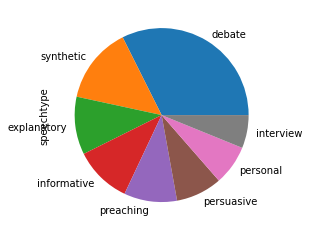

In [68]:
df.speechtype.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='speakertype'>

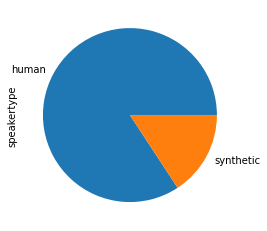

In [70]:
df.speakertype.value_counts().plot(kind='pie')